# Introduction to Titanic dataset
<!-- Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them. -->

# Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

# The Data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df=df.drop(['PassengerId','Name','Sex','Ticket','Fare','Cabin','Embarked'],axis=1)

In [5]:
df

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0
...,...,...,...,...,...
886,0,2,27.0,0,0
887,1,1,19.0,0,0
888,0,3,NaN,1,2
889,1,1,26.0,0,0


# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

# Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
dtype: int64

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


<Axes: >

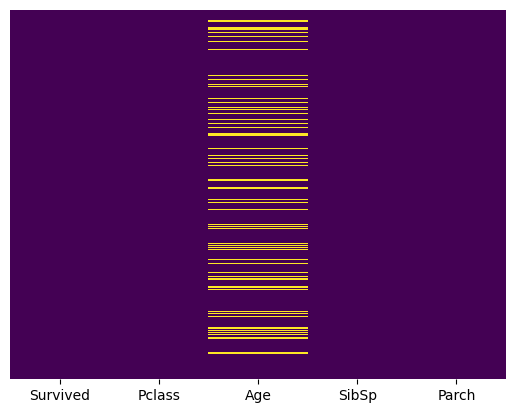

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

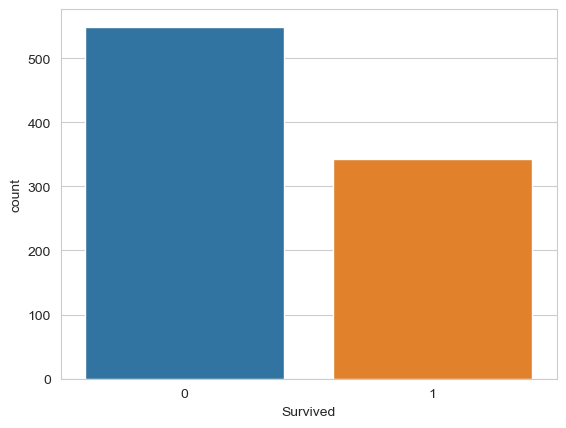

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

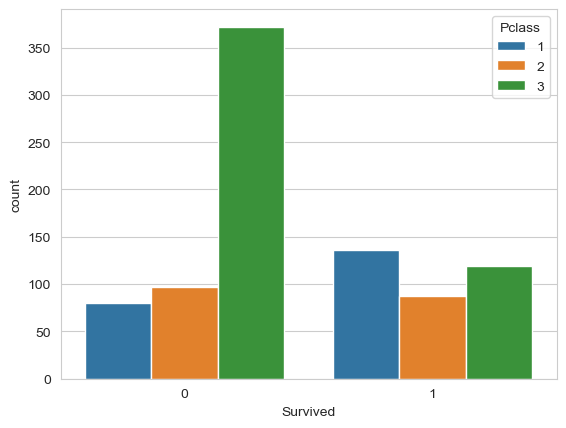

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

<Axes: >

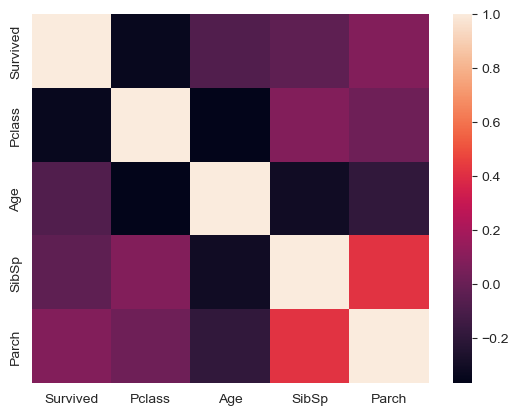

In [11]:
sns.heatmap(df.corr())

C:\Users\yukte\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


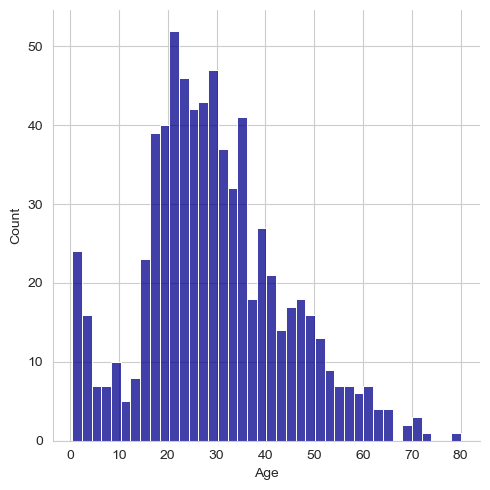

In [12]:
sns.displot(data=df['Age'].dropna(),kde=False,color='darkblue',bins=40)

<Axes: >

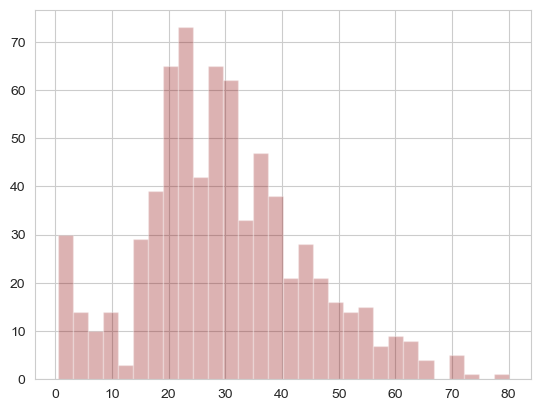

In [13]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

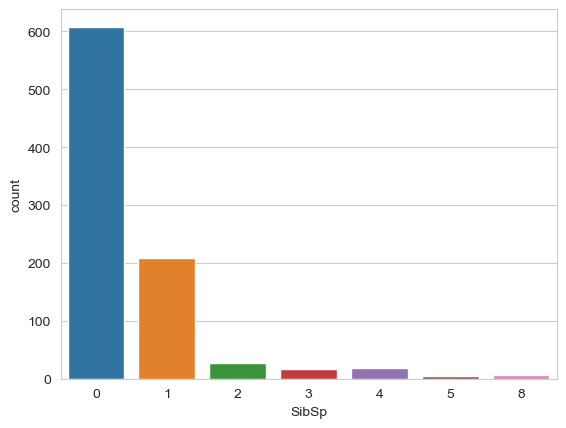

In [14]:
sns.countplot(x='SibSp',data=df)

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<Axes: xlabel='Pclass', ylabel='Age'>

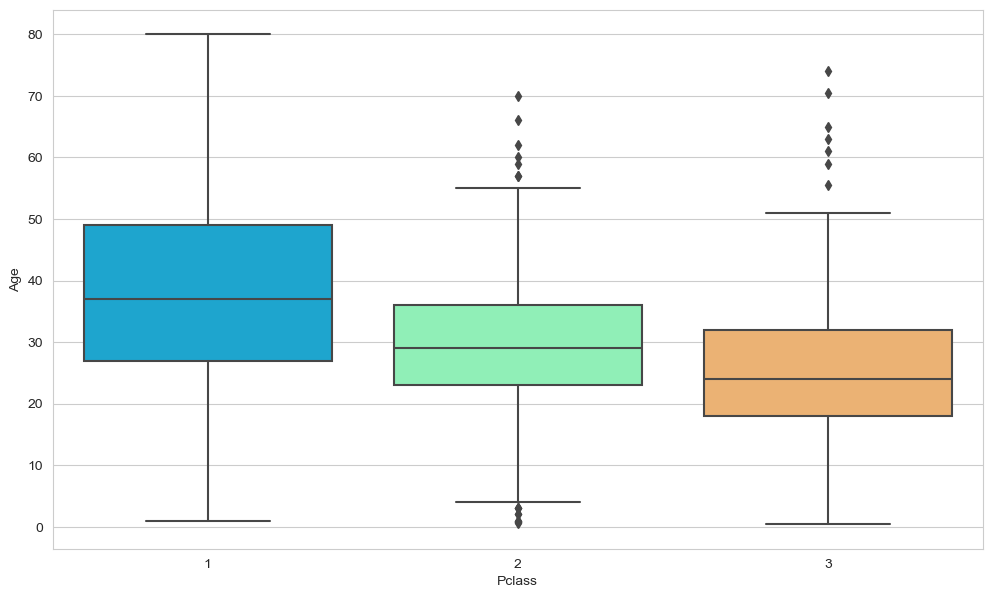

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='rainbow')

# To fill NaN values with the mean for the Age column in a DataFrame

In [16]:
age_median=df['Age'].median()
df['Age']=df['Age'].fillna(math.floor(age_median))
df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
dtype: int64

In [17]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: >

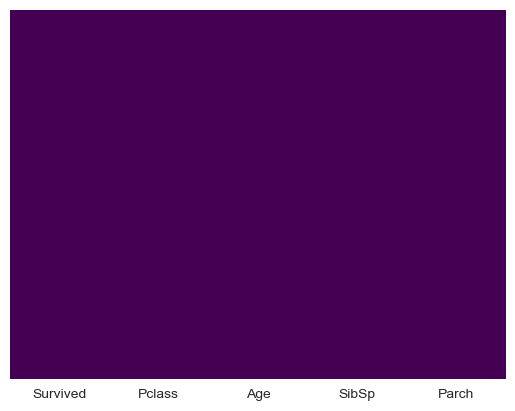

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # to check if there is any null value

In [19]:
df

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0
...,...,...,...,...,...
886,0,2,27.0,0,0
887,1,1,19.0,0,0
888,0,3,28.0,1,2
889,1,1,26.0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [21]:
df=df.astype('float64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    float64
dtypes: float64(5)
memory usage: 34.9 KB


In [23]:
df

,Survived,Pclass,Age,SibSp,Parch
0,0.0,3.0,22.0,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0
3,1.0,1.0,35.0,1.0,0.0
4,0.0,3.0,35.0,0.0,0.0
...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0
887,1.0,1.0,19.0,0.0,0.0
888,0.0,3.0,28.0,1.0,2.0
889,1.0,1.0,26.0,0.0,0.0


In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch
0,0.0,3.0,22.0,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0
3,1.0,1.0,35.0,1.0,0.0
4,0.0,3.0,35.0,0.0,0.0


# Distribute the data and categorize training and testing data

In [25]:
X=df.iloc[:,1:].values
y=df['Survived'].values

In [26]:
X

array([[ 3., 22.,  1.,  0.],
       [ 1., 38.,  1.,  0.],
       [ 3., 26.,  0.,  0.],
       ...,
       [ 3., 28.,  1.,  2.],
       [ 1., 26.,  0.,  0.],
       [ 3., 32.,  0.,  0.]])

In [27]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
X_train

array([[ 3., 28.,  0.,  2.],
       [ 2., 31.,  0.,  0.],
       [ 2., 31.,  1.,  1.],
       ...,
       [ 3., 28.,  0.,  0.],
       [ 3., 36.,  1.,  0.],
       [ 2., 60.,  1.,  1.]])

In [30]:
X_test

array([[ 3.  , 28.  ,  0.  ,  0.  ],
       [ 3.  , 28.  ,  0.  ,  0.  ],
       [ 3.  ,  7.  ,  4.  ,  1.  ],
       [ 1.  , 28.  ,  1.  ,  0.  ],
       [ 3.  , 29.  ,  0.  ,  2.  ],
       [ 1.  , 28.  ,  0.  ,  0.  ],
       [ 1.  , 40.  ,  0.  ,  0.  ],
       [ 1.  , 31.  ,  0.  ,  2.  ],
       [ 1.  , 25.  ,  1.  ,  0.  ],
       [ 3.  , 28.  ,  0.  ,  0.  ],
       [ 3.  , 26.  ,  1.  ,  0.  ],
       [ 2.  , 40.  ,  0.  ,  0.  ],
       [ 3.  , 28.  ,  0.  ,  0.  ],
       [ 2.  ,  7.  ,  0.  ,  2.  ],
       [ 1.  , 24.  ,  0.  ,  0.  ],
       [ 3.  , 14.  ,  0.  ,  0.  ],
       [ 3.  , 23.  ,  0.  ,  0.  ],
       [ 2.  , 19.  ,  1.  ,  1.  ],
       [ 3.  , 35.  ,  0.  ,  0.  ],
       [ 3.  ,  0.42,  0.  ,  1.  ],
       [ 2.  , 18.  ,  0.  ,  0.  ],
       [ 1.  , 22.  ,  0.  ,  0.  ],
       [ 3.  , 28.  ,  0.  ,  0.  ],
       [ 1.  , 28.  ,  0.  ,  0.  ],
       [ 3.  , 22.  ,  0.  ,  0.  ],
       [ 1.  , 40.  ,  1.  ,  1.  ],
       [ 3.  , 32.  ,  0.  ,  0.  ],
 

In [31]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
print(X_train,X_test)

[[ 0.81925059 -0.10684835 -0.46445234  1.95926403]
 [-0.38096838  0.12218133 -0.46445234 -0.47741019]
 [-0.38096838  0.12218133  0.41270964  0.74092692]
 ...
 [ 0.81925059 -0.10684835 -0.46445234 -0.47741019]
 [ 0.81925059  0.50389745  0.41270964 -0.47741019]
 [-0.38096838  2.33613483  0.41270964  0.74092692]] [[ 0.81925059 -0.10684835 -0.46445234 -0.47741019]
 [ 0.81925059 -0.10684835 -0.46445234 -0.47741019]
 [ 0.81925059 -1.71005606  3.04419557  0.74092692]
 [-1.58118735 -0.10684835  0.41270964 -0.47741019]
 [ 0.81925059 -0.03050512 -0.46445234  1.95926403]
 [-1.58118735 -0.10684835 -0.46445234 -0.47741019]
 [-1.58118735  0.80927034 -0.46445234 -0.47741019]
 [-1.58118735  0.12218133 -0.46445234  1.95926403]
 [-1.58118735 -0.33587802  0.41270964 -0.47741019]
 [ 0.81925059 -0.10684835 -0.46445234 -0.47741019]
 [ 0.81925059 -0.2595348   0.41270964 -0.47741019]
 [-0.38096838  0.80927034 -0.46445234 -0.47741019]
 [ 0.81925059 -0.10684835 -0.46445234 -0.47741019]
 [-0.38096838 -1.71005606

# Training and Predicting

In [33]:
log_reg=LogisticRegression()

In [34]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred=log_reg.predict(X_test)

In [36]:
y_pred

array([0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0.])

In [37]:
y_test

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0.])

In [38]:
accuracy_score(y_test,y_pred)

0.7486033519553073

In [39]:
confusion_matrix(y_test,y_pred)

array([[98, 12],
       [33, 36]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81       110
         1.0       0.75      0.52      0.62        69

    accuracy                           0.75       179
   macro avg       0.75      0.71      0.71       179
weighted avg       0.75      0.75      0.74       179

